# 전략

Fan만 가지고 하기

## 과제1 설명

Noise별 각 모델들끼리 합쳐서 모델 돌리기
- 모델은 LGBM, down sampling : kaiser_best, 모델링 불균형 : scale_pos_weight(0정상 / 1비정상 : 비율), split : stratified_train_test_split(8:2)
- A
    - 0 : id_00
    - _6 : id_00
    - 6 : id_00
- B
    - 0 : id_02
    - _6 : id_02
    - 6 : id_02
- C
    - 0 : id_04
    - _6 : id_04
    - 6 : id_04
- D
    - 0 : id_06
    - _6 : id_06
    - 6 : id_06

각각의 f1-score와 AUC 저장해놓기

총 구해야할것들
- f1-score : 4개(과제1번)
- Noise : 4개(과제1번)

# Module Import

In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import time

from tqdm import tqdm
from sklearn.model_selection import train_test_split

##부모파일에 있는 py파일 읽기
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('load_data.py'))))
 
from load_data import load_data_using_multi_process
from model import model_lgbm
from make_roc_curve import make_roc_curve

from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, recall_score, precision_score

/package/anaconda3.8/lib/python3.8/site-packages/dask/dataframe/backends.py:189: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/package/anaconda3.8/lib/python3.8/site-packages/dask/dataframe/backends.py:189: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/package/anaconda3.8/lib/python3.8/site-packages/dask/dataframe/backends.py:189: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


# 데이터로드

##  id_00
- fan 0
    - id_02
- fan _6
    - id_02
- fan 6
    - id_02

In [2]:
obj = 'fan'
model0 = '0'
model_6 = '_6'
model6 = '6'
###############################
id_name = 'id_00'

In [3]:
##fan_0_
fan_0_id_00_path = '/data/time_series/'+obj+'/'+model0+'/' + id_name
fan_0_id_00_files = glob.glob(fan_0_id_00_path + '/*/*')
print(obj+'_'+model0+'_id_00_files 개수 : ', len(fan_0_id_00_files))
print('\n')

##fan__6_
fan__6_id_00_path = '/data/time_series/'+obj+'/'+model_6+'/' + id_name
fan__6_id_00_files = glob.glob(fan__6_id_00_path + '/*/*')
print(obj+'_'+model_6+'_id_00_files 개수 : ', len(fan__6_id_00_files))
print('\n')

##fan_0_
fan_6_id_00_path = '/data/time_series/'+obj+'/'+model6+'/' + id_name
fan_6_id_00_files = glob.glob(fan_6_id_00_path + '/*/*')
print(obj+'_'+model6+'_id_00_files 개수 : ', len(fan_6_id_00_files))
print('\n')

fan_0_id_00_files 개수 :  1418


fan__6_id_00_files 개수 :  1418


fan_6_id_00_files 개수 :  1418




### sr과 target_sr정하기

In [4]:
sr = 16000
target_sr = 125

### Multi processing

In [5]:
fan_0_ = load_data_using_multi_process(files = fan_0_id_00_files, sr = sr, target_sr = target_sr)
fan__6_ = load_data_using_multi_process(files = fan__6_id_00_files, sr = sr, target_sr = target_sr)
fan_6_= load_data_using_multi_process(files = fan_6_id_00_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 4.080935955047607 ---

아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 4.122319936752319 ---

아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 

In [7]:
len(fan_0_), len(fan_0_[0])

(1418, 1251)

### 전처리

In [9]:
if (len(fan_0_[0]) == (target_sr*10 + 1)) & (len(fan__6_[0])==(target_sr*10 + 1)) & (len(fan_6_[0])==(target_sr*10 + 1)):
    fan_0_ = pd.DataFrame(fan_0_)
    fan__6_ = pd.DataFrame(fan__6_)
    fan_6_ = pd.DataFrame(fan_6_)

In [10]:
len(fan_0_.iloc[0]), len(fan__6_.iloc[0]),len(fan_6_.iloc[0])

(1251, 1251, 1251)

In [11]:
df = pd.concat([fan_0_,fan__6_,fan_6_])

if df.columns[-1] == target_sr*10 :
    df.rename(columns={target_sr*10:'label'}, inplace=True)

df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,label
0,0.001645,-0.002448,-0.000202,0.006906,-0.002643,-0.004263,0.001194,0.001432,0.003003,-0.001835,...,-0.001010,-0.002250,0.001470,0.003306,-0.000752,-0.001221,-0.000723,-0.000063,0.000773,0.0
1,-0.001730,-0.000265,-0.000823,-0.000196,0.000530,0.001405,0.000366,-0.002229,-0.000261,0.000162,...,-0.000177,-0.000635,0.001977,0.001711,-0.002113,-0.000641,-0.000726,0.000248,0.003054,0.0
2,0.002049,0.000400,0.001896,0.000136,-0.001880,-0.000638,0.000182,0.001706,0.000808,-0.000729,...,0.001074,0.001004,-0.000966,-0.000785,-0.000573,0.000162,0.002021,0.000290,-0.001078,0.0
3,0.002865,0.000465,-0.002853,-0.001195,0.000601,0.000739,0.000548,-0.000326,0.000449,0.000208,...,-0.001227,0.000273,-0.000780,0.003895,-0.001298,-0.003045,0.002451,-0.000416,0.001539,0.0
4,0.002674,-0.000509,-0.001474,-0.000813,0.000003,0.000859,0.001174,-0.000436,-0.001450,0.000374,...,0.000595,0.001309,0.000788,-0.000659,-0.000851,-0.001709,0.000650,0.002366,-0.000151,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,-0.003358,0.001260,-0.000175,-0.002945,-0.000131,0.000004,0.002636,-0.000036,-0.000123,-0.000354,...,0.002548,0.000429,0.000344,-0.001143,-0.002542,0.001105,0.000697,0.002619,-0.001087,1.0
4250,-0.000804,-0.000624,-0.001183,-0.000623,0.000216,0.001757,0.000654,-0.001382,-0.001207,-0.000639,...,0.002133,0.000519,-0.001659,-0.000656,-0.000508,0.000908,0.001500,-0.000596,-0.001546,1.0
4251,0.001636,0.003068,-0.000737,-0.000752,-0.002758,0.000779,0.003397,-0.001045,-0.001359,-0.000763,...,0.002819,0.002043,-0.003972,-0.001538,-0.000635,0.001800,0.002949,-0.001940,-0.000628,1.0
4252,0.000704,-0.004175,0.000913,-0.000389,0.000365,0.002629,-0.001297,-0.001821,-0.000634,0.000539,...,0.000423,-0.000816,0.000343,0.002192,-0.000650,-0.001727,-0.001771,0.000746,0.000229,1.0


In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,label
0,0.001645,-0.002448,-0.000202,0.006906,-0.002643,-0.004263,0.001194,0.001432,0.003003,-0.001835,...,-0.001010,-0.002250,0.001470,0.003306,-0.000752,-0.001221,-0.000723,-0.000063,0.000773,0.0
1,-0.001730,-0.000265,-0.000823,-0.000196,0.000530,0.001405,0.000366,-0.002229,-0.000261,0.000162,...,-0.000177,-0.000635,0.001977,0.001711,-0.002113,-0.000641,-0.000726,0.000248,0.003054,0.0
2,0.002049,0.000400,0.001896,0.000136,-0.001880,-0.000638,0.000182,0.001706,0.000808,-0.000729,...,0.001074,0.001004,-0.000966,-0.000785,-0.000573,0.000162,0.002021,0.000290,-0.001078,0.0
3,0.002865,0.000465,-0.002853,-0.001195,0.000601,0.000739,0.000548,-0.000326,0.000449,0.000208,...,-0.001227,0.000273,-0.000780,0.003895,-0.001298,-0.003045,0.002451,-0.000416,0.001539,0.0
4,0.002674,-0.000509,-0.001474,-0.000813,0.000003,0.000859,0.001174,-0.000436,-0.001450,0.000374,...,0.000595,0.001309,0.000788,-0.000659,-0.000851,-0.001709,0.000650,0.002366,-0.000151,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,-0.003358,0.001260,-0.000175,-0.002945,-0.000131,0.000004,0.002636,-0.000036,-0.000123,-0.000354,...,0.002548,0.000429,0.000344,-0.001143,-0.002542,0.001105,0.000697,0.002619,-0.001087,1.0
4250,-0.000804,-0.000624,-0.001183,-0.000623,0.000216,0.001757,0.000654,-0.001382,-0.001207,-0.000639,...,0.002133,0.000519,-0.001659,-0.000656,-0.000508,0.000908,0.001500,-0.000596,-0.001546,1.0
4251,0.001636,0.003068,-0.000737,-0.000752,-0.002758,0.000779,0.003397,-0.001045,-0.001359,-0.000763,...,0.002819,0.002043,-0.003972,-0.001538,-0.000635,0.001800,0.002949,-0.001940,-0.000628,1.0
4252,0.000704,-0.004175,0.000913,-0.000389,0.000365,0.002629,-0.001297,-0.001821,-0.000634,0.000539,...,0.000423,-0.000816,0.000343,0.002192,-0.000650,-0.001727,-0.001771,0.000746,0.000229,1.0


### data split
- Stratified train test split(8:2)

In [13]:


X = df.iloc[:, :target_sr*10]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print('X_train 의 크기 : ', X_train.shape)
print('X_test 의 크기 : ', X_test.shape)
print('y_train 의 크기 : ', y_train.shape)
print('y_test 의 크기 : ', y_test.shape)


X_train 의 크기 :  (3403, 1250)
X_test 의 크기 :  (851, 1250)
y_train 의 크기 :  (3403,)
y_test 의 크기 :  (851,)


In [14]:
print(y_train.value_counts())

0.0    2426
1.0     977
Name: label, dtype: int64


In [15]:
print(y_test.value_counts())

0.0    607
1.0    244
Name: label, dtype: int64


### 모델링
- LGBM
    - scale_pos_weight : 0의개수(정상) / 1의개수(비정상)

In [16]:
model = model_lgbm(df)

normal : 3033
abnormal : 1221
scale_pos_weight is 2.48.
Model is ready to running.


In [17]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)



/package/anaconda3.8/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


### ROC커브그리기

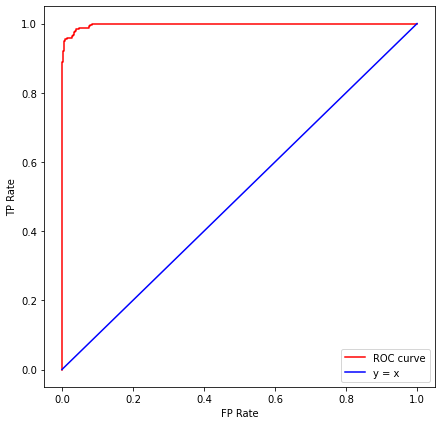

acc_score : 0.968
recall_score : 0.893
precision_score : 0.995
f1_score : 0.942
roc auc value : 0.998


(0.968, 0.942, 0.893, 0.995)

In [18]:
make_roc_curve(y_test, y_pred, y_pred_prob)

### id_00정리
- acc_score : 0.968
- recall_score : 0.893
- precision_score : 0.995
- f1_score : 0.942
- roc auc value : 0.998

## id_02

In [22]:
obj = 'fan'
model0 = '0'
model_6 = '_6'
model6 = '6'
###############################
id_name = 'id_02'

In [24]:
##fan_0_
fan_0_id_00_path = '/data/time_series/'+obj+'/'+model0+'/' + id_name
fan_0_id_00_files = glob.glob(fan_0_id_00_path + '/*/*')
print(obj+'_'+model0+'_id_00_files 개수 : ', len(fan_0_id_00_files))
print('\n')

##fan__6_
fan__6_id_00_path = '/data/time_series/'+obj+'/'+model_6+'/' + id_name
fan__6_id_00_files = glob.glob(fan__6_id_00_path + '/*/*')
print(obj+'_'+model_6+'_id_00_files 개수 : ', len(fan__6_id_00_files))
print('\n')

##fan_0_
fan_6_id_00_path = '/data/time_series/'+obj+'/'+model6+'/' + id_name
fan_6_id_00_files = glob.glob(fan_6_id_00_path + '/*/*')
print(obj+'_'+model6+'_id_00_files 개수 : ', len(fan_6_id_00_files))
print('\n')

fan_0_id_00_files 개수 :  1375


fan__6_id_00_files 개수 :  1375


fan_6_id_00_files 개수 :  1375




In [25]:
fan_0_ = load_data_using_multi_process(files = fan_0_id_00_files, sr = sr, target_sr = target_sr)
fan__6_ = load_data_using_multi_process(files = fan__6_id_00_files, sr = sr, target_sr = target_sr)
fan_6_= load_data_using_multi_process(files = fan_6_id_00_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: soxr_lq

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 1.5913710594177246 ---

아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: soxr_lq

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 1.6328482627868652 ---

아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_

In [26]:
if (len(fan_0_[0][0]) == (target_sr*10+1)) & (len(fan__6_[0][0])==(target_sr*10+1)) & (len(fan_6_[0][0])==(target_sr*10+1)):
    fan_0_ = [one[0] for one in fan_0_]
    fan_0_ = pd.DataFrame(fan_0_)
    
    fan__6_ = [one[0] for one in fan__6_]
    fan__6_ = pd.DataFrame(fan__6_)
    
    fan_6_ = [one[0] for one in fan_6_]
    fan_6_ = pd.DataFrame(fan_6_)

In [27]:
df = pd.concat([fan_0_,fan__6_,fan_6_])

if df.columns[-1] == target_sr*10 :
    df.rename(columns={target_sr*10:'label'}, inplace=True)

df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,label
0,0.000946,-0.000736,0.000171,0.000991,-0.001048,-0.000507,0.000727,-0.000595,-0.001005,0.001277,...,-0.000426,0.000499,0.002745,0.000200,-0.002223,0.000441,0.000486,-0.000553,0.000039,0.0
1,0.000355,0.001804,-0.001557,-0.000259,-0.000397,-0.000136,0.000098,-0.002379,0.001357,0.001437,...,-0.000486,-0.001464,0.002513,0.000916,-0.001759,0.001121,0.000841,0.000023,0.001154,0.0
2,0.001029,0.001601,0.000430,-0.001520,-0.001047,0.000453,0.000409,-0.000483,-0.001740,0.001139,...,-0.001420,0.001167,0.000654,-0.000722,0.000660,0.000612,0.000216,-0.000677,-0.000546,0.0
3,-0.000187,-0.003477,0.003917,-0.000775,-0.004713,0.003415,-0.000764,-0.000738,0.001080,-0.000458,...,0.001815,-0.001535,-0.001914,0.000516,-0.001826,0.000181,0.001963,-0.000523,0.000694,0.0
4,0.001351,0.002103,-0.003054,0.000090,0.001319,-0.000752,0.001405,0.001082,-0.001599,-0.001481,...,0.000027,-0.000187,0.000295,-0.002079,-0.000106,0.001644,-0.000850,-0.000428,0.000925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,0.000136,0.000593,0.000220,-0.000200,-0.000340,-0.000647,0.000527,0.000388,-0.000321,-0.000026,...,-0.000408,0.000126,0.000431,-0.000274,0.000093,0.000349,-0.000289,-0.000117,0.000422,1.0
4121,0.000852,0.000047,-0.000414,0.000602,-0.000510,-0.000080,0.000366,-0.000334,0.000266,-0.000212,...,0.000020,0.000328,-0.000160,-0.000371,-0.000198,0.000287,0.000408,-0.000160,-0.000068,1.0
4122,-0.000402,0.000599,0.002098,-0.001061,-0.001796,0.000956,0.000257,-0.000550,-0.000100,0.000184,...,0.000879,0.001460,-0.001391,-0.000270,0.000313,-0.000999,0.001244,0.000393,-0.001228,1.0
4123,-0.001489,-0.000358,0.001033,-0.000778,0.001554,-0.000053,-0.001205,0.000971,-0.001467,0.000494,...,-0.000817,0.000987,-0.000013,-0.000217,0.000645,-0.001700,0.000261,0.001125,-0.000767,1.0


In [28]:
X = df.iloc[:, :target_sr*10]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print('X_train 의 크기 : ', X_train.shape)
print('X_test 의 크기 : ', X_test.shape)
print('y_train 의 크기 : ', y_train.shape)
print('y_test 의 크기 : ', y_test.shape)

X_train 의 크기 :  (3300, 1250)
X_test 의 크기 :  (825, 1250)
y_train 의 크기 :  (3300,)
y_test 의 크기 :  (825,)


In [29]:
model = model_lgbm(df)

normal : 3048
abnormal : 1077
scale_pos_weight is 2.83.
Model is ready to running.


In [30]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

/package/anaconda3.8/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


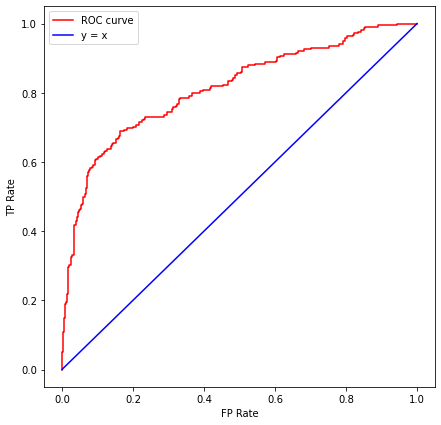

acc_score : 0.795
recall_score : 0.26
precision_score : 0.848
f1_score : 0.399
roc auc value : 0.812


(0.795, 0.399, 0.26, 0.848)

In [31]:
aa = make_roc_curve(y_test, y_pred, y_pred_prob)
aa

### id_02정리
- acc_score : 0.795
- recall_score : 0.26
- precision_score : 0.848
- f1_score : 0.399
- roc auc value : 0.812

## id_04

In [32]:
obj = 'fan'
model0 = '0'
model_6 = '_6'
model6 = '6'
###############################
id_name = 'id_04'

In [33]:
##fan_0_
fan_0_id_00_path = '/data/time_series/'+obj+'/'+model0+'/' + id_name
fan_0_id_00_files = glob.glob(fan_0_id_00_path + '/*/*')
print(obj+'_'+model0+'_id_00_files 개수 : ', len(fan_0_id_00_files))
print('\n')

##fan__6_
fan__6_id_00_path = '/data/time_series/'+obj+'/'+model_6+'/' + id_name
fan__6_id_00_files = glob.glob(fan__6_id_00_path + '/*/*')
print(obj+'_'+model_6+'_id_00_files 개수 : ', len(fan__6_id_00_files))
print('\n')

##fan_0_
fan_6_id_00_path = '/data/time_series/'+obj+'/'+model6+'/' + id_name
fan_6_id_00_files = glob.glob(fan_6_id_00_path + '/*/*')
print(obj+'_'+model6+'_id_00_files 개수 : ', len(fan_6_id_00_files))
print('\n')

fan_0_id_00_files 개수 :  1381


fan__6_id_00_files 개수 :  1381


fan_6_id_00_files 개수 :  1381




In [35]:
fan_0_ = load_data_using_multi_process(files = fan_0_id_00_files, sr = sr, target_sr = target_sr)
fan__6_ = load_data_using_multi_process(files = fan__6_id_00_files, sr = sr, target_sr = target_sr)
fan_6_= load_data_using_multi_process(files = fan_6_id_00_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: soxr_lq

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 1.7624962329864502 ---

아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: soxr_lq

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 1.8061270713806152 ---

아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_

In [36]:
if (len(fan_0_[0][0]) == (target_sr*10 + 1)) & (len(fan__6_[0][0])==(target_sr*10 + 1)) & (len(fan_6_[0][0])==(target_sr*10 + 1)):
    fan_0_ = [one[0] for one in fan_0_]
    fan_0_ = pd.DataFrame(fan_0_)
    
    fan__6_ = [one[0] for one in fan__6_]
    fan__6_ = pd.DataFrame(fan__6_)
    
    fan_6_ = [one[0] for one in fan_6_]
    fan_6_ = pd.DataFrame(fan_6_)

In [37]:
df = pd.concat([fan_0_,fan__6_,fan_6_])

if df.columns[-1] == target_sr*10 :
    df.rename(columns={target_sr*10:'label'}, inplace=True)

df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,label
0,0.002363,-0.001046,-0.000688,0.000679,-0.000117,-0.001900,-0.000505,0.002023,0.000466,0.001408,...,0.000637,-0.001692,-0.001678,0.003447,0.001538,-0.001466,-0.000163,-0.000870,-0.001322,0.0
1,0.002328,-0.000944,0.001628,0.000592,-0.002903,-0.000626,0.000791,-0.000558,-0.000845,0.002327,...,0.002048,-0.001089,-0.000561,0.001379,-0.000938,0.000752,-0.001326,-0.003325,0.002545,0.0
2,-0.000382,0.000388,0.001563,0.001894,-0.001183,-0.000371,-0.001716,-0.002288,0.001621,0.001014,...,0.001534,0.000074,-0.002337,0.000661,-0.001428,0.000356,0.001857,-0.001395,0.000856,0.0
3,-0.001214,0.000303,0.001091,-0.001070,0.000696,0.000749,-0.000512,0.001539,-0.000620,-0.000664,...,-0.000109,-0.000757,0.001035,-0.000620,0.000732,0.000370,-0.001684,0.000572,0.000938,0.0
4,-0.000152,0.001341,0.001614,-0.004479,0.001846,0.002708,-0.002796,0.002506,-0.001309,-0.001511,...,-0.001728,0.002203,-0.000244,-0.000826,0.001080,-0.001809,0.000622,0.000249,0.000213,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,-0.000973,0.001259,-0.000184,-0.001766,0.002070,-0.000188,-0.000418,0.000395,-0.001609,0.001130,...,-0.000419,0.001417,0.000031,0.000399,-0.001102,-0.000333,0.001807,-0.000704,-0.000552,1.0
4139,-0.000747,-0.001092,0.000713,0.000954,-0.000156,-0.001411,0.000820,0.001017,-0.002455,0.000684,...,0.002075,-0.001486,0.000127,-0.000102,-0.000397,0.000432,-0.001603,0.001867,0.000874,1.0
4140,0.001481,-0.000264,-0.000236,0.000006,-0.000711,0.000375,-0.000561,0.000092,0.001302,-0.000312,...,0.000960,-0.001044,0.000152,0.000277,-0.000659,0.000941,-0.000034,0.000201,0.000397,1.0
4141,0.000181,0.000839,-0.000742,0.000631,-0.000045,-0.000768,0.000855,-0.000935,0.000681,0.000779,...,0.000940,-0.000512,-0.001506,0.001438,-0.000446,-0.000407,0.000788,-0.000704,0.000690,1.0


In [38]:
X = df.iloc[:, :target_sr*10]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print('X_train 의 크기 : ', X_train.shape)
print('X_test 의 크기 : ', X_test.shape)
print('y_train 의 크기 : ', y_train.shape)
print('y_test 의 크기 : ', y_test.shape)

X_train 의 크기 :  (3314, 1250)
X_test 의 크기 :  (829, 1250)
y_train 의 크기 :  (3314,)
y_test 의 크기 :  (829,)


In [39]:
model = model_lgbm(df)

normal : 3099
abnormal : 1044
scale_pos_weight is 2.97.
Model is ready to running.


In [40]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

/package/anaconda3.8/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


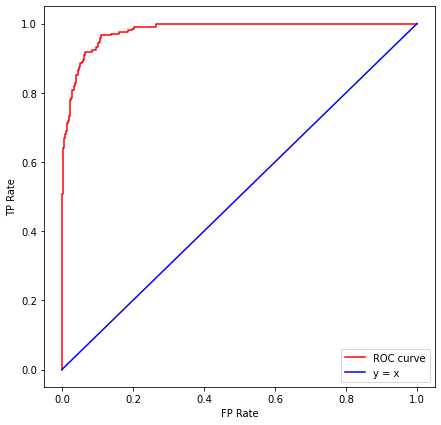

acc_score : 0.907
recall_score : 0.641
precision_score : 0.985
f1_score : 0.777
roc auc value : 0.98


(0.907, 0.777, 0.641, 0.985)

In [41]:
aa = make_roc_curve(y_test, y_pred, y_pred_prob)
aa

### id_04정리
- acc_score : 0.907
- recall_score : 0.641
- precision_score : 0.985
- f1_score : 0.777
- roc auc value : 0.98

## id_06

In [42]:
obj = 'fan'
model0 = '0'
model_6 = '_6'
model6 = '6'
###############################
id_name = 'id_06'

In [43]:
##fan_0_
fan_0_id_00_path = '/data/time_series/'+obj+'/'+model0+'/' + id_name
fan_0_id_00_files = glob.glob(fan_0_id_00_path + '/*/*')
print(obj+'_'+model0+'_id_00_files 개수 : ', len(fan_0_id_00_files))
print('\n')

##fan__6_
fan__6_id_00_path = '/data/time_series/'+obj+'/'+model_6+'/' + id_name
fan__6_id_00_files = glob.glob(fan__6_id_00_path + '/*/*')
print(obj+'_'+model_6+'_id_00_files 개수 : ', len(fan__6_id_00_files))
print('\n')

##fan_0_
fan_6_id_00_path = '/data/time_series/'+obj+'/'+model6+'/' + id_name
fan_6_id_00_files = glob.glob(fan_6_id_00_path + '/*/*')
print(obj+'_'+model6+'_id_00_files 개수 : ', len(fan_6_id_00_files))
print('\n')

fan_0_id_00_files 개수 :  1376


fan__6_id_00_files 개수 :  1376


fan_6_id_00_files 개수 :  1376




In [44]:
fan_0_ = load_data_using_multi_process(files = fan_0_id_00_files, sr = sr, target_sr = target_sr)
fan__6_ = load_data_using_multi_process(files = fan__6_id_00_files, sr = sr, target_sr = target_sr)
fan_6_= load_data_using_multi_process(files = fan_6_id_00_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: soxr_lq

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 1.8055503368377686 ---

아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: soxr_lq

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 1.7581920623779297 ---

아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_

In [45]:
if (len(fan_0_[0][0]) == (target_sr*10 + 1)) & (len(fan__6_[0][0])==(target_sr*10 + 1)) & (len(fan_6_[0][0])==(target_sr*10 + 1)):
    fan_0_ = [one[0] for one in fan_0_]
    fan_0_ = pd.DataFrame(fan_0_)
    
    fan__6_ = [one[0] for one in fan__6_]
    fan__6_ = pd.DataFrame(fan__6_)
    
    fan_6_ = [one[0] for one in fan_6_]
    fan_6_ = pd.DataFrame(fan_6_)

In [46]:
df = pd.concat([fan_0_,fan__6_,fan_6_])

if df.columns[-1] == target_sr*10 :
    df.rename(columns={target_sr*10:'label'}, inplace=True)

df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,label
0,0.000250,-0.000178,0.000739,-0.000691,-0.000679,0.001447,-0.000442,-0.000498,0.000705,-0.000277,...,-0.000059,0.000337,-0.000285,-0.000052,-0.000284,-0.000083,0.000648,-0.000683,0.000179,0.0
1,0.000211,0.000768,-0.002082,-0.001868,0.001373,0.001999,0.001244,-0.000786,0.000217,-0.000225,...,-0.000137,0.001097,-0.001292,0.001903,0.001058,0.000155,-0.001268,-0.002160,0.000465,0.0
2,0.001881,-0.002029,0.001564,0.001019,-0.000020,-0.000467,-0.003095,0.003125,-0.001325,-0.001128,...,-0.000036,-0.000877,-0.000496,0.000662,0.000331,-0.000480,0.000234,0.001185,-0.000426,0.0
3,-0.000181,-0.000417,0.000102,0.001461,0.000156,0.000047,-0.000252,-0.000753,0.000347,-0.000701,...,-0.001238,0.000172,0.000757,0.001367,0.000543,-0.001384,-0.000275,-0.001229,-0.000804,0.0
4,0.000983,-0.000099,-0.000365,-0.000499,-0.000174,0.000724,-0.000254,-0.000115,0.000034,-0.000810,...,-0.000460,-0.000141,0.000429,0.000173,-0.000293,0.000178,-0.000537,0.000172,0.000535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.000125,0.000523,0.000122,-0.000567,-0.000374,0.000453,0.000254,-0.000462,0.000492,0.000157,...,0.000045,-0.000239,0.000257,-0.000326,-0.000233,0.000466,-0.000172,0.000344,0.000426,1.0
4124,-0.000280,0.000528,0.000180,-0.000504,0.000033,-0.000244,0.000145,0.000553,-0.000102,0.000165,...,-0.000291,-0.000099,-0.000227,-0.000387,0.000576,-0.000307,0.000005,0.000563,-0.000520,1.0
4125,0.000093,0.000059,0.000004,0.000277,0.000067,-0.000444,0.000252,0.000173,-0.000361,-0.000111,...,0.001361,0.000209,-0.000150,-0.000279,-0.000035,0.000662,-0.000403,-0.000088,0.000494,1.0
4126,0.000094,0.001244,0.000468,-0.000656,-0.001384,-0.000563,0.000743,0.000131,0.000743,0.001033,...,-0.000239,-0.000036,-0.000283,0.000427,0.000599,-0.000162,-0.000404,0.000289,0.000286,1.0


In [47]:
X = df.iloc[:, :target_sr*10]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print('X_train 의 크기 : ', X_train.shape)
print('X_test 의 크기 : ', X_test.shape)
print('y_train 의 크기 : ', y_train.shape)
print('y_test 의 크기 : ', y_test.shape)

X_train 의 크기 :  (3302, 1250)
X_test 의 크기 :  (826, 1250)
y_train 의 크기 :  (3302,)
y_test 의 크기 :  (826,)


In [48]:
model = model_lgbm(df)

normal : 3045
abnormal : 1083
scale_pos_weight is 2.81.
Model is ready to running.


In [49]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

/package/anaconda3.8/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


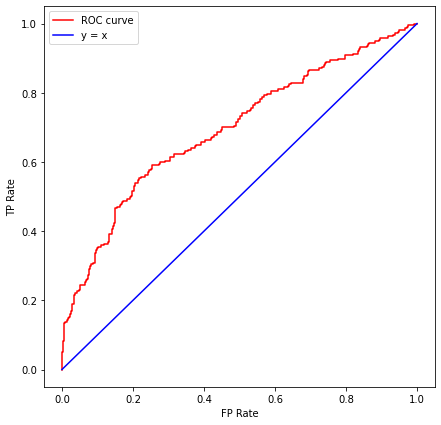

acc_score : 0.762
recall_score : 0.166
precision_score : 0.692
f1_score : 0.268
roc auc value : 0.694


(0.762, 0.268, 0.166, 0.692)

In [51]:
aa = make_roc_curve(y_test, y_pred, y_pred_prob)
aa

### id_06정리
- acc_score : 0.762
- recall_score : 0.166
- precision_score : 0.692
- f1_score : 0.268
- roc auc value : 0.694

## 총정리

model	accuracy	recall	precision	f1_score	AUC
id_00	0.968	0.893	0.995	0.942	0.998
id_02	0.795	0.26	0.848	0.399	0.812
id_04	0.907	0.641	0.985	0.777	0.98
id_06	0.762	0.166	0.692	0.268	0.694


In [56]:
# acc_score = [0.991, 0.766, 0.876, 0.748]
# f1_score = [0.983, 0.206,  0.677, 0.212]
# AUC = [1.0, 0.695,  0.926, 0.617]
data = pd.read_csv('./ModelingResult/fan_model.csv')
acc_score = data['accuracy'].values
f1_score = data['f1_score'].values
AUC = data['AUC'].values

/tmp/ipykernel_155734/379594811.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(['', 'id_00', 'id_02', 'id_04', 'id_06'])
/tmp/ipykernel_155734/379594811.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(['', 'id_00', 'id_02', 'id_04', 'id_06'])
/tmp/ipykernel_155734/379594811.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(['', 'id_00', 'id_02', 'id_04', 'id_06'])


[Text(-1.0, 0, ''),
 Text(0.0, 0, 'id_00'),
 Text(1.0, 0, 'id_02'),
 Text(2.0, 0, 'id_04'),
 Text(3.0, 0, 'id_06'),
 Text(4.0, 0, '')]

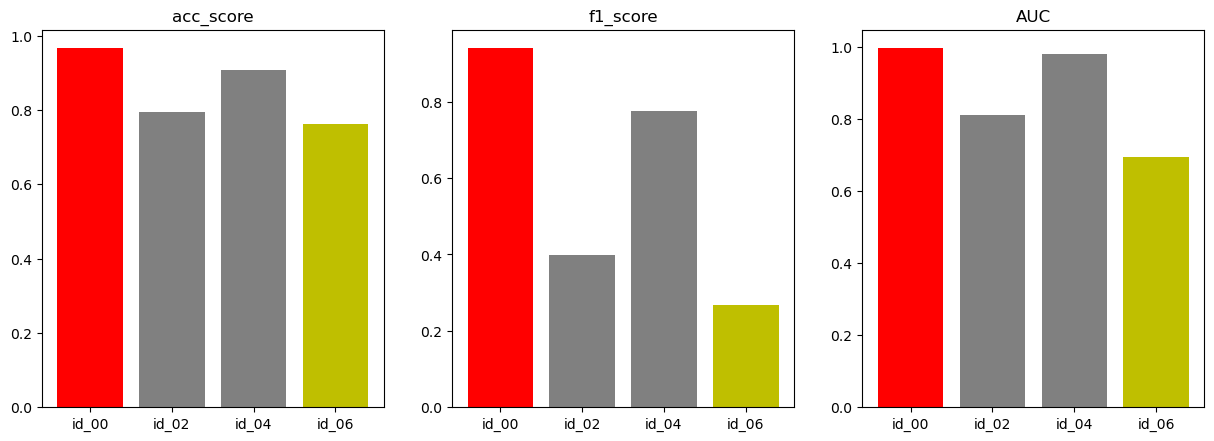

In [57]:
fig = plt.figure(figsize=(15,5), dpi = 100)
axs = fig.subplots(1,3)

## axs[0] : acc_score
X1 = range(0, len(acc_score))
color_li = ['grey'] * len(acc_score)
color_li[np.argmax(acc_score)] = 'r'
color_li[np.argmin(acc_score)] = 'y'
axs[0].bar(X1, acc_score, color=color_li)
axs[0].set_title('acc_score')
axs[0].set_xticklabels(['', 'id_00', 'id_02', 'id_04', 'id_06'])

## axs[1] : f1_score
X1 = range(0, len(f1_score))
color_li = ['grey'] * len(f1_score)
color_li[np.argmax(f1_score)] = 'r'
color_li[np.argmin(acc_score)] = 'y'
axs[1].bar(X1, f1_score, color=color_li)
axs[1].set_title('f1_score')
axs[1].set_xticklabels(['', 'id_00', 'id_02', 'id_04', 'id_06'])

## axs[2] : AUC
X1 = range(0, len(AUC))
color_li = ['grey'] * len(AUC)
color_li[np.argmax(AUC)] = 'r'
color_li[np.argmin(acc_score)] = 'y'
axs[2].bar(X1, AUC, color=color_li)
axs[2].set_title('AUC')
axs[2].set_xticklabels(['', 'id_00', 'id_02', 'id_04', 'id_06'])

In [58]:
import numpy as np
np.mean(data, axis=0)

/home/jihoonmanse/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


accuracy     0.8580
recall       0.4900
precision    0.8800
f1_score     0.5965
AUC          0.8710
dtype: float64

In [60]:
data

,model,accuracy,recall,precision,f1_score,AUC
0,id_00,0.968,0.893,0.995,0.942,0.998
1,id_02,0.795,0.260,0.848,0.399,0.812
2,id_04,0.907,0.641,0.985,0.777,0.980
3,id_06,0.762,0.166,0.692,0.268,0.694


해석
- id_02과 id_06의 recall값이 매우 낮다. 
    - 이 아이디들에서 정상데이터를 비정상으로 오분류한다.
- id_02와 id_06에서 accuracy값이 다른것들에 비해서 상대적으로 낮다.